<p>
<font size=5 color="#5A5A5A" face = "Lano"><center><b><font size=5 color="#FCAC45" face = "Lano">People Analytics:</font></b> MIST</center></font>
</p>
<p>
<center><font size=3 color="#5A5A5A" face = "Lano"><em>
Python 3<br>
OCTO Technology - Clément Tailleur - People Analytics : <u>Clustering</u>
</em></font></center>
</p>
<br>

<font size=4 color="#FCAC45" face = "Lano"><B><u>Summary</u></B>
</font><br><br>
<font size=3.2 color="#5A5A5A" face = "Lano">
<a href='#VII'><font color = "#5A5A5A"><b>VII</b> - Data Vectorization</font></a><br>
<a href='#VIII'><font color = "#5A5A5A"><b>VIII</b> - Clustering <i>(df_workable)</i></font></a><br>
  &nbsp;&nbsp;&nbsp;<b>A</b> - Kmeans<br>
  &nbsp;&nbsp;&nbsp;<b>B</b> - Dimensionality reduction / Visualization<br>
  &nbsp;&nbsp;&nbsp;<b>C</b> - Get most similar words<br>
</font>
<br>

<font size=3 color="#5A5A5A" face = "Lano">
<font color="#FCAC45">•</font> We have a .csv file 'data_processed.csv' having subjects email data we cleaned before.<br> 
The goal of this notebook will be to detect natural topics in those emails.
</font>
<br><br>
<font size=5 color="#5A5A5A" face = "Lano">
  <a id='VII'></a>
  <b>VII</b> - Data Vectorization<br>
</font>

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Data extraction
df_workable = pd.read_csv("../data/data_processed.csv", sep=",")

# Vectorization of "Subject_Stem" which is our clean data emails column
# We have to recover only unique emails
VEC = CountVectorizer()
X_unique = df_workable["Subject_Stem"].drop_duplicates(keep='first').reset_index(drop = True).tolist()
X_unique_counts = VEC.fit_transform(X_unique)

# From matrix Matrix to Dataframe
vocab = VEC.get_feature_names()
df_workable_Full_unique = pd.DataFrame(X_unique_counts.todense(),columns=vocab)
df_workable_Full_unique.head()

,_accor_plan,_air,_architecture,_baie,_benchmark_markeplaces_v,_bgl,_d,_draft_adept,_esi,_europcar,...,zone,zoning,zont,zookeeper,zoom,zopa,zotto,zurich,zwn,zypper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<font size=5 color="#5A5A5A" face = "Lano">
  <a id='VIII'></a>
  <b>VIII</b> - Clusterification<br>
  <font size=4>
  &nbsp;&nbsp;&nbsp;<b>A</b> - Kmeans<br>
  </font>
</font>

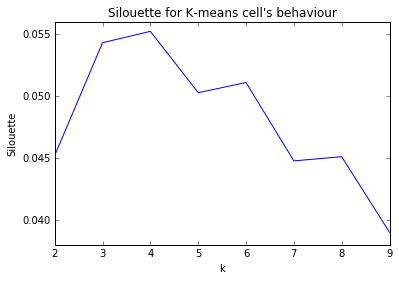

In [2]:
# Silhouettes compute in order to obtain the optimum cluster number
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pickle

# It's a very long computation so we registered our results in a txt file
def get_silhouette(max_cluster, vectorized_param, min_cluster = 0):
    s = []
    if max_cluster <= min_cluster:
        return None
    for n_clusters in range(min_cluster ,max_cluster):
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(vectorized_param)
        labels = kmeans.labels_
        s.append(silhouette_score(vectorized_param, labels, metric='euclidean'))
    return s


def load_list(path):
    with open(path, "rb") as file:
        list_loaded = pickle.load(file)
    return list_loaded


min_cluster, max_cluster = 2, 10
#silhouettes = get_silhouette(min_cluster, max_cluster, X_unique_counts)
#save_list("../models/Kmeans/silhouettes.txt", silhouettes)
silhouettes = load_list("../models/Kmeans/silhouettes.txt")

plt.plot(range(min_cluster, max_cluster), silhouettes)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
plt.show()

In [3]:
# We compute our algorithm using the best silhouette and save the model obtained
from sklearn.externals import joblib

silhouettes_dict = {}
for i, s in zip(range(min_cluster, max_cluster), range(len(silhouettes))):
    silhouettes_dict[silhouettes[s]] = i

num_clusters = silhouettes_dict[max(silhouettes)]
#km = KMeans(n_clusters=num_clusters).fit(X_unique_counts)
#joblib.dump(km, '../models/Kmeans/km_5_clusters.pkl')

km = joblib.load('../models/Kmeans/km_5_clusters.pkl')
clusters = km.labels_.tolist()

In [4]:
# Now we can associate for each subject the cluster it belongs to.
mails = {'cluster': clusters, 'subject': X_unique}
frame = pd.DataFrame(mails, index = [clusters] , columns = ['subject', 'cluster'])
frame.head()

,subject,cluster
2,venez bouger corp,2
2,invitation baf sanofi alain faure,2
2,diagramme,2
2,bof blockchain,2
0,mise jour diner octo acn,0


In [5]:
from __future__ import print_function

# In order to have an idea of natural topics, we display for each cluster the 15 most representative words.
# (centroid notion) 
print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Number of subjects: %d"  % frame['cluster'][i].value_counts())
    print("Cluster %d words:" % i)
    
    for ind in order_centroids[i, :15]:
        print(vocab[ind], end=', ')
    print("\n\n")
#END FOR

Top terms per cluster:

Number of subjects: 5016
Cluster 0 words:
octo, people, bruit, invitation, question, corporate, audit, technology, tech, biz, proposition, fintech, presentation, formation, tr, 


Number of subjects: 4980
Cluster 1 words:
people, bruit, tech, question, bof, bbl, usi, afh, biz, fierte, nouveau, corporate, nouvelle, presentation, google, 


Number of subjects: 28282
Cluster 2 words:
invitation, question, biz, point, audit, mission, accepted, web, api, formation, manager, atelier, bbl, fintech, updated, 


Number of subjects: 7294
Cluster 3 words:
tech, octo, question, afh, pg, java, web, bbl, biz, article, recherche, api, test, re, blog, 




In [6]:
# Thanks to the first clusters definition, we determined 3 topics
# 1. Technique | 2. Business-Management | 3. Corporate
# Number of subjects by cluster
frame['cluster'].value_counts() 

2    28282
3     7294
0     5016
1     4980
Name: cluster, dtype: int64

<font size=4 color="#5A5A5A" face = "Lano">
  &nbsp;&nbsp;&nbsp;<b>B</b> - Dimensionality reduction / Visualization<br>
  </font>
</font>

In [7]:
import random

# In term of visualization we need to have only two dimensions.
# The compute is too long and too expensive for our computer so we decided to take a random sample of our data.
# We have to vectorized it and compute again the silhouette from this sample.
# Frome here we will make our dimensionality reduction
VEC_viz = CountVectorizer()
X_viz_unique = random.sample(X_unique, 2000) #sample size: 2000
X_viz_unique_counts = VEC_viz.fit_transform(X_viz_unique)
vocab_viz = VEC_viz.get_feature_names()

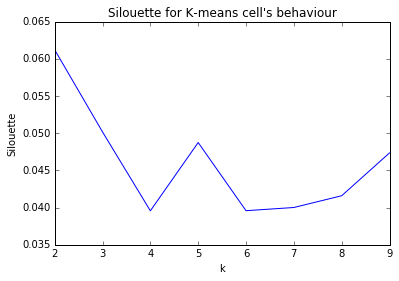

In [8]:
silhouettes_viz = []
n_clusters = range(2,10)
for c in n_clusters:
    kmeans = KMeans(n_clusters=c)
    kmeans.fit(X_viz_unique_counts)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    silhouettes_viz.append(silhouette_score(X_viz_unique_counts, labels, metric='euclidean'))

plt.close()
plt.plot(n_clusters, silhouettes_viz)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
plt.show()

In [9]:
#clusters_viz
silhouettes_dict_viz = {}
for i, s in zip(range(min_cluster, max_cluster), range(len(silhouettes_viz))):
    silhouettes_dict_viz[silhouettes_viz[s]] = i

num_clusters_viz = silhouettes_dict_viz[max(silhouettes_viz)]
km_viz = KMeans(n_clusters=num_clusters_viz).fit(X_viz_unique_counts)
clusters_viz = km_viz.labels_.tolist()

#df_viz
mails_viz = { 'cluster': clusters_viz, 'subject': X_viz_unique}
frame_viz = pd.DataFrame(mails_viz, index = [clusters_viz] , columns = ['subject', 'cluster'])

In [10]:
print("Top terms per cluster:")
print()
order_centroids_viz = km_viz.cluster_centers_.argsort()[:, ::-1] 
clusters_viz_title = {}

for i in range(num_clusters_viz):
    print("Number of subjetcs: %d"  % frame_viz['cluster'][i].value_counts())
    print("Cluster %d words:" % i)
    
    clusters_viz_title[i] = []
    for ind in order_centroids_viz[i, :10]:
        clusters_viz_title[i].append(vocab_viz[ind])
        print(vocab_viz[ind], end=', ')
    print("\n\n")
#END FOR

Top terms per cluster:

Number of subjetcs: 358
Cluster 0 words:
tech, octo, question, afh, people, java, pg, bbl, api, web, 


Number of subjetcs: 1642
Cluster 1 words:
people, octo, invitation, question, biz, bruit, point, web, audit, accepted, 




In [11]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X_viz_unique_counts)

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS 

# Dimension reduction using distances
MDS()
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist) 
xs, ys = pos[:, 0], pos[:, 1]

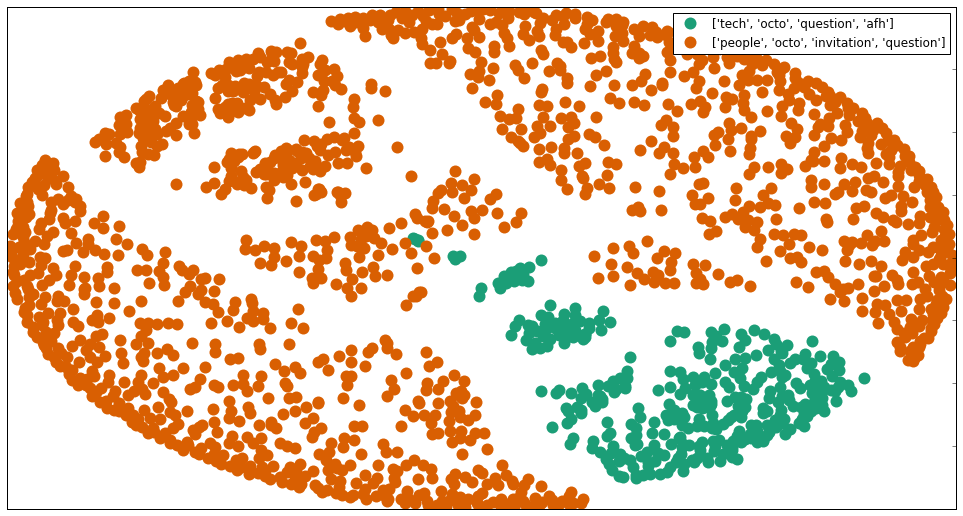

In [13]:
def plot_cluster_viz(num_clusters_viz, xs, ys, clusters_viz, num_title_words, max_colors=5):
    if num_clusters_viz > max_colors:
        print("Please add cluster_colors parameters")
        return 0
    else:
        cluster_viz_colors = {}
        cluster_viz_names = {}
        for i in range(num_clusters_viz):
            cluster_viz_colors[i] = cluster_colors[i]
            cluster_viz_names[i] = clusters_viz_title[i][:num_title_words]
            
        df = pd.DataFrame(dict(x=xs, y=ys, label=clusters_viz))
        groups = df.groupby('label')
        fig, ax = plt.subplots(figsize=(17, 9))
        for name, group in groups:
            ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_viz_names[name], 
                    color=cluster_colors[name], mec='none')
            ax.set_aspect('auto')
            ax.tick_params(axis= 'x', which='both', bottom='off', top='off', labelbottom='off')
            ax.tick_params(axis= 'y', which='both', left='off', top='off', labelleft='off')
        ax.legend(numpoints=1)
        return plt

cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}
plt = plot_cluster_viz(num_clusters_viz, xs, ys, clusters_viz, num_title_words=4)
plt.show()

<font size=4 color="#5A5A5A" face = "Lano">
  &nbsp;&nbsp;&nbsp;<b>C</b> - Get most similar words<br>
  </font>
</font>

In [14]:
from gensim.models import Word2Vec,Phrases,Doc2Vec,TfidfModel

def F_mytokenizer(text):
    return text.split(' ')[1:]

num_features = 50 # dimension du vecteur
df_workable["Subject_Stem_token"] = df_workable["Subject_Stem"].apply(lambda x: F_mytokenizer(x))
model_SP = Word2Vec(df_workable["Subject_Stem_token"].values.tolist(),
                    min_count=1, workers=8, size=num_features, window=5)

In [15]:
model_SP.most_similar("fhi", topn=5)

[('stup', 0.770706832408905),
 ('barbecue', 0.7464317679405212),
 ('atten', 0.7348333597183228),
 ('organisateur', 0.7330218553543091),
 ('spe', 0.7198160886764526)]

In [16]:
model_SP.most_similar("bda", topn=5)

[('data', 0.5290841460227966),
 ('grid', 0.4901813268661499),
 ('learn', 0.4857099652290344),
 ('mind', 0.4811649024486542),
 ('wechat', 0.47951358556747437)]

In [17]:
model_SP.most_similar("afh", topn=5)

[('matrice', 0.4670647978782654),
 ('binome', 0.46608737111091614),
 ('responsabilisante', 0.4483664035797119),
 ('surc', 0.4471732974052429),
 ('template', 0.44220292568206787)]

<!--![title](description_nb/animations/end.jpeg)-->
<p>
<center><font size=3 color="#5A5A5A" face = "Lano"><em>
OCTO Technology - Clément Tailleur
</em></font></center>
</p>